In [1]:
import numpy as np
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

K.set_image_data_format('channels_last')

print("keras.__version__", keras.__version__)
print("numpy.__version__", np.__version__)

keras.__version__ 2.9.0
numpy.__version__ 1.21.5


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
 
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)
print()


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)
print()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print('X_train.reshape : ', X_train.shape)
print('X_test.reshape : ', X_test.shape)
print()


X_train.shape :  (60000, 28, 28)
X_test.shape :  (10000, 28, 28)
y_train.shape :  (60000,)
y_test.shape :  (10000,)

y_train.shape :  (60000, 10)
y_test.shape :  (10000, 10)

X_train.reshape :  (60000, 28, 28, 1)
X_test.reshape :  (10000, 28, 28, 1)



In [3]:
model=Sequential()
   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [5]:
epochs = 100
batch_size = 128

es = EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [6]:
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2 ,batch_size=batch_size, epochs=epochs, callbacks=[es, rp])

Epoch 1/100
375/375 [==============================] - 4s 6ms/step - loss: 0.0907 - accuracy: 0.9720 - val_loss: 0.7507 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0572 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0339 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0341 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0501 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0663 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 7/100
373/375 [============================>.] - ETA: 0s -

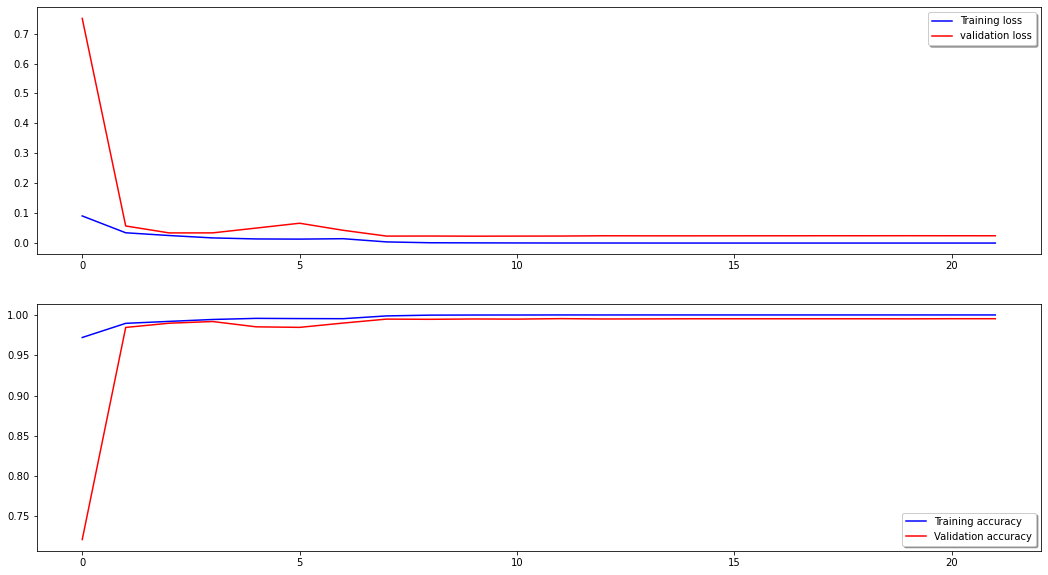

In [7]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

313/313 [==============================] - 0s 1ms/step


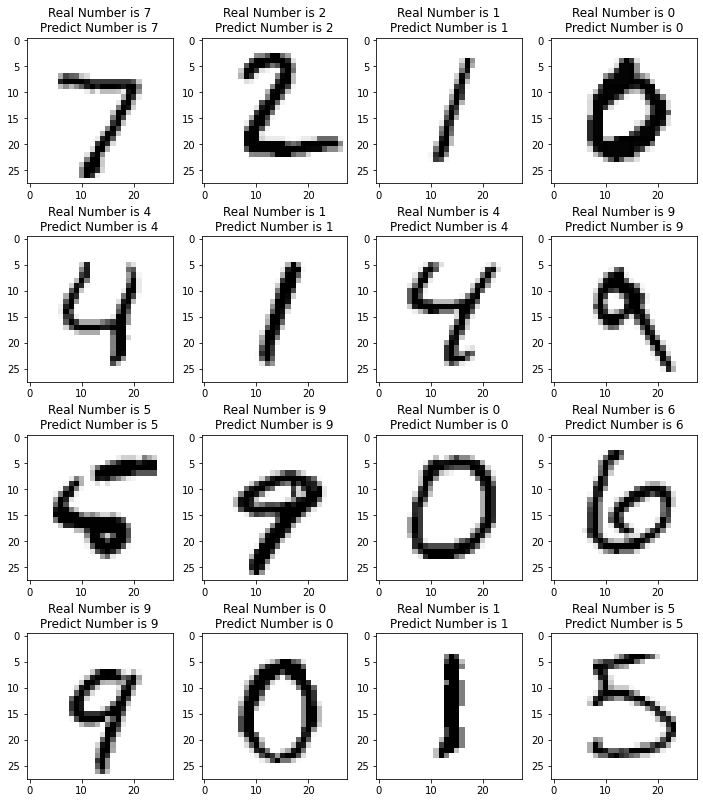

In [8]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");